# Link prediction

In [10]:
%pip install networkx
%pip install node2vec

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached node2vec-0.4.4-py3-none-any.whl (6.8 kB)
     |████████████████████████████████| 76 kB 1.2 MB/s eta 0:00:011
     |████████████████████████████████| 306 kB 742 kB/s eta 0:00:01
     |████████████████████████████████| 24.0 MB 813 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 592 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Number of nodes : 34
Number of edges : 78
Number of connected components : 1


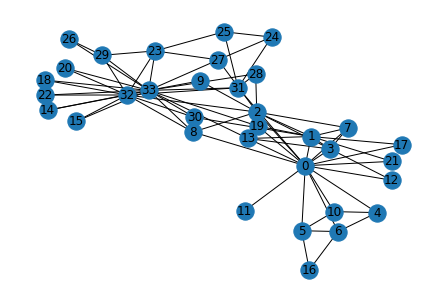

In [11]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

n=34
m = 78
G_karate = nx.karate_club_graph()

pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % m)
print("Number of connected components : %d" % nx.number_connected_components(G_karate))



In [12]:
# Remove 20% das arestas
proportion_edges = 0.2
edge_subset = random.sample(G_karate.edges(), int(proportion_edges * G_karate.number_of_edges()))

# Cria uma cópia do grafo e remove arestas
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

/var/folders/qs/_w0pzk750d11j9_r3dl_vlk40000gn/T/ipykernel_99664/3670015890.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edge_subset = random.sample(G_karate.edges(), int(proportion_edges * G_karate.number_of_edges()))


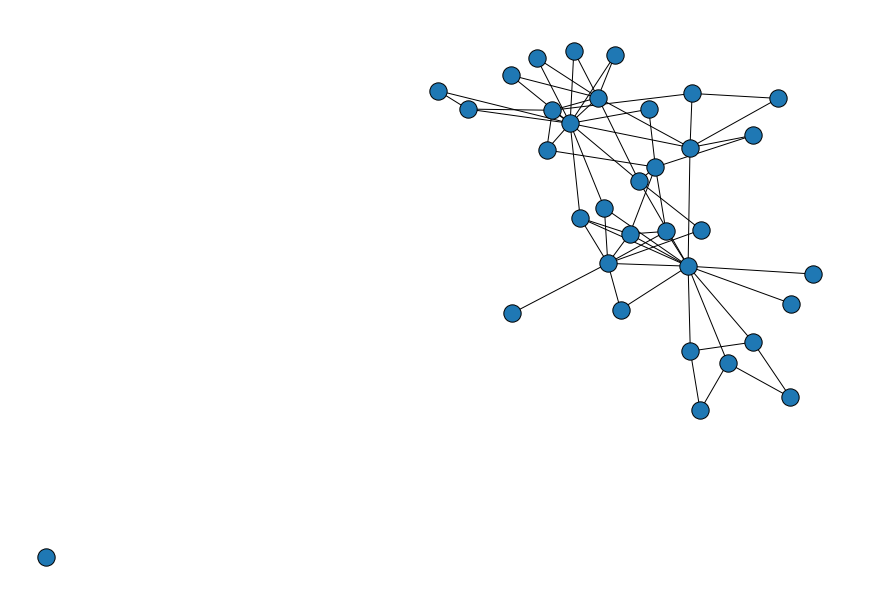

In [13]:
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)
plt.gca().collections[0].set_edgecolor("#000000") 


In [14]:
edge_subset_size = len(list(edge_subset))
print("Numero de arestas deletadas : %d" % edge_subset_size)
print("Numero de arestas restantes : %d" % (m - edge_subset_size))

Numero de arestas deletadas : 15
Numero de arestas restantes : 63


## Jaccard coefficient

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Fazendo previsões com o jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_karate_train))


score_jaccard = [s for (u,v,s) in pred_jaccard]
label_jaccard = [(u,v) in edge_subset for (u,v,s) in pred_jaccard]


# Computa o AUC score da curva ROC
fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)
print(auc_jaccard)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_jaccard, tpr_jaccard, 'b', label = 'AUC = %0.2f' % auc_jaccard)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()


ModuleNotFoundError: No module named 'sklearn'

## Preferential Attachment

In [ ]:
pred_prefAtch = list(nx.preferential_attachment(G_karate_train))

score_prefAtch = [s for (u,v,s) in pred_prefAtch]

label_prefAtch = [(u,v) in edge_subset for (u,v,s) in pred_prefAtch]

# Computa o AUC score da curva ROC
fpr_prefAtch, tpr_prefAtch, _ = metrics.roc_curve(label_prefAtch, score_prefAtch)
auc_prefAtch = roc_auc_score(label_prefAtch, score_prefAtch)
print(auc_prefAtch)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_prefAtch, tpr_prefAtch, 'b', label = 'AUC = %0.2f' % auc_prefAtch)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

## Resource Allocation

In [ ]:
pred_ra = list(nx.resource_allocation_index(G_karate_train))

score_ra = [s for (u,v,s) in pred_ra]

label_ra = [(u,v) in edge_subset for (u,v,s) in pred_ra]

# Computa o AUC score da curva ROC
fpr_ra, tpr_ra, _ = metrics.roc_curve(label_ra, score_ra)
auc_ra = roc_auc_score(label_ra, score_ra)
print(auc_ra)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_ra, tpr_ra, 'b', label = 'AUC = %0.2f' % auc_ra)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()



## Common Neighbor Centrality

In [ ]:
## Esta implementação depende do Networkx 2.6 que roda somente no python 3.7. Nesta máquina está com python 3.5

pred_CNC = list(nx.common_neighbor_centrality(G_karate_train))

score_CNC = [s for (u,v,s) in pred_CNC]

label_CNC= [(u,v) in edge_subset for (u,v,s) in pred_CNC]


fpr_CNC, tpr_CNC, _ = metrics.roc_curve(label_CNC, score_CNC)
auc_CNC = roc_auc_score(label_CNC, score_CNC)
print(auc_adamic)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_CNC, tpr_CNC, 'b', label = 'AUC = %0.2f' % auc_CNC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

## Adamic-Adar

In [ ]:
pred_adamic = list(nx.adamic_adar_index(G_karate_train))

score_adamic = [s for (u,v,s) in pred_adamic]

label_adamic = [(u,v) in edge_subset for (u,v,s) in pred_adamic]

fpr_adamic, tpr_adamic, _ = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)
print(auc_adamic)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_adamic, tpr_adamic, 'b', label = 'AUC = %0.2f' % auc_adamic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

### Todas as ROC

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_adamic, tpr_adamic, 'b', label = 'Adamic AUC = %0.2f' % auc_adamic)
plt.plot(fpr_jaccard, tpr_jaccard, 'r', label = 'Jaccard AUC = %0.2f' % auc_jaccard)
plt.plot(fpr_prefAtch, tpr_prefAtch, 'g', label = 'Pref Atch AUC = %0.2f' % auc_prefAtch)
plt.plot(fpr_ra, tpr_ra, 'y', label = 'RA AUC = %0.2f' % auc_ra)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

# Predição de links do da rede do Facebook

In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

G_facebook = nx.read_edgelist("facebook_combined.txt",create_using = nx.Graph(), nodetype = int)
print(nx.info(G_facebook))

In [ ]:
A = nx.adjacency_matrix(G_facebook)
A.shape

### Pegar todas as possibilidades de pares não conectados

In [ ]:
# para guardar todos os pares de nós não conectados 
listUnconnected = []

# Varre a matriz de adjacência procurando por pares desconectados
offset = 0
for i in tqdm(range(A.shape[0])):
    for j in range(offset,A.shape[1]):
        if i != j:
            if A[i,j] == 0:
                listUnconnected.append([i,j])

    offset +=1

In [ ]:
unlinked1 = [i[0] for i in listUnconnected]
unlinked2 = [i[1] for i in listUnconnected]

dfPairs = pd.DataFrame({'node1':unlinked1, 
                     'node2':unlinked2})

# cria a variável 'link', onde 0= sem link e 1 com link
dfPairs['link'] = 0
dfPairs

### Removendo arestas do grafo original

In [ ]:
prop = 0.2
edge_subset = random.sample(G_facebook.edges(), int(prop * G_facebook.number_of_edges()))

# Cria uma cópia do grafo e remove arestas
G_facebook_train = G_facebook.copy()
G_facebook_train.remove_edges_from(edge_subset)


In [ ]:
df = pd.DataFrame(edge_subset, columns=['node1', 'node2'])
df['link'] = 1

dfPairs = dfPairs.append(df)
dfPairs

### Node embeddings com o node2vec

In [ ]:
from node2vec import Node2Vec

# Gera caminhos 
node2vec = Node2Vec(G_facebook_train, dimensions=100, walk_length=16, num_walks=50)

# treina o modelo node2vec
n2w_model = node2vec.fit(window=7, min_count=1)

In [ ]:
featuresPares = [(n2w_model.wv[str(i)]+n2w_model.wv[str(j)]) for i,j in zip(dfPairs['node1'], dfPairs['node2'])]

### Separação dos dados para treino e teste

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(featuresPares), dfPairs['link'], 
                                                test_size = 0.3, 
                                                random_state = 10)

### Teste com uma regressão logística

In [ ]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

### Fazendo predições

In [ ]:
predictions = lr.predict_proba(xtest)

### AUC

In [ ]:
roc_auc_score(ytest, predictions[:,1])

### Acurácia e F1-score

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

predicao = (predictions[:,1]>=.5).astype(int)

print(accuracy_score(ytest, previsao))
print(f1_score(ytest, previsao))

In [ ]:
## Testem o desempenho com LightGBM